In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import json

In [3]:
def get_results_dir(env: str, alg: str) -> Path:
  root_dir = Path.cwd().parent
  results_dir = root_dir / "results" / env / alg 
  return results_dir

In [11]:
def read_analysis_results(env: str, alg: str):
  results_dir = get_results_dir(env, alg)
  analysis_results_path = results_dir / "analysis_results.json"
  with open(analysis_results_path, "r", encoding="utf-8") as f:
    analysis_results = json.load(f)
  return analysis_results

In [2]:
def read_history(env: str, alg: str) -> pd.DataFrame:
  results_dir = get_results_dir(env, alg)
  history_path = results_dir / "history.csv"
  history_df = pd.read_csv(history_path)
  return history_df

In [6]:
def compare_history(algs_to_compare):

  pairs_df = []

  for opt in algs_to_compare:
    history1_df = read_history(opt['env1'], opt['alg'])
    history1_df['reward_ma'] = history1_df['reward'].rolling(window=50).mean()

    history2_df = read_history(opt['env2'], opt['alg'])
    history2_df['reward_ma'] = history2_df['reward'].rolling(window=50).mean()

    pairs_df.append([history1_df, history2_df])

  fig, axes = plt.subplots(2, 2, figsize=(10, 8))


  axes[0, 0].plot(pairs_df[0][0]['reward_ma'], color='red', linewidth=2, label=algs_to_compare[0]['name1'])
  axes[0, 0].plot(pairs_df[0][1]['reward_ma'], color='blue', linewidth=2, label=algs_to_compare[0]['name2'])
  axes[0, 0].set_title(algs_to_compare[0]['name'])


  axes[0, 1].plot(pairs_df[1][0]['reward_ma'], color='red', linewidth=2, label=algs_to_compare[1]['name1'])
  axes[0, 1].plot(pairs_df[1][1]['reward_ma'], color='blue', linewidth=2, label=algs_to_compare[1]['name2'])
  axes[0, 1].set_title(algs_to_compare[1]['name'])

  axes[1, 0].plot(pairs_df[2][0]['reward_ma'], color='red', linewidth=2, label=algs_to_compare[2]['name1'])
  axes[1, 0].plot(pairs_df[2][1]['reward_ma'], color='blue', linewidth=2, label=algs_to_compare[2]['name2'])
  axes[1, 0].set_title(algs_to_compare[2]['name'])


  axes[1, 1].plot(pairs_df[3][0]['reward_ma'], color='red', linewidth=2, label=algs_to_compare[3]['name1'])
  axes[1, 1].plot(pairs_df[3][1]['reward_ma'], color='blue', linewidth=2, label=algs_to_compare[3]['name2'])
  axes[1, 1].set_title(algs_to_compare[3]['name'])

  for ax in axes.flatten():
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.legend()
    ax.set_xlabel("Ітерація")
    ax.set_ylabel("Нагорода")

  plt.tight_layout() 
  plt.show()

In [8]:
to_compare = [
  {
    'alg': 'mab',
    'env1': 'simulation',
    'env2': 'hardware',
    'name1': 'Симуляція',
    'name2': 'Експеримент',
    'name': 'MAB'
  },
  {
    'alg': 'mab_decay',
    'env1': 'simulation',
    'env2': 'hardware',
    'name1': 'Симуляція',
    'name2': 'Експеримент',
    'name': 'MABD'
  },
  {
    'alg': 'ucb',
    'env1': 'simulation',
    'env2': 'hardware',
    'name1': 'Симуляція',
    'name2': 'Експеримент',
    'name': 'UCB-MCB'
  },
  {
    'alg': 'gradient',
    'env1': 'simulation',
    'env2': 'hardware',
    'name1': 'Симуляція',
    'name2': 'Експеримент',
    'name': 'Gradient'
  }
]

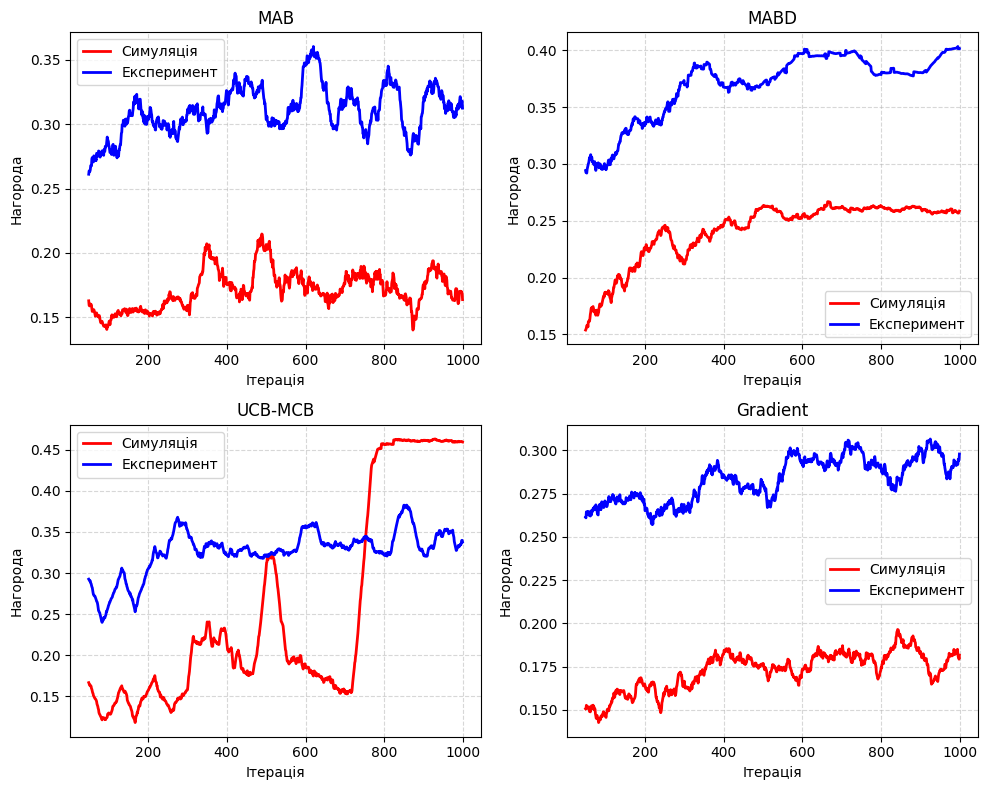

In [ ]:
compare_history(to_compare)

In [ ]:
def compare_ucb_params():

  pairs_df = [
    [
      read_history('simulation', 'ucb_e7_a3_e2'),
      read_history('simulation', 'ucb_e8_a3_e2'),
      read_history('simulation', 'ucb_e9_a3_e2')
    ],
    [
      read_history('simulation', 'ucb_e9_a2_e2'),
      read_history('simulation', 'ucb_e9_a3_e2'),
      read_history('simulation', 'ucb_e9_a4_e2')
    ],
      [
      read_history('simulation', 'ucb_e9_a3_e1'),
      read_history('simulation', 'ucb_e9_a3_e2'),
      read_history('simulation', 'ucb_e9_a3_e3')
    ]
  ]

  labels = [
    [
      'epsilon 0.7',
      'epsilon 0.8',
      'epsilon 0.9'
    ],
    [
      'alpha 0.2',
      'alpha 0.3',
      'alpha 0.4'
    ],
    [
      'exploration_factor 0.1',
      'exploration_factor 0.2',
      'exploration_factor 0.3'
    ]
  ]

  fig, axes = plt.subplots(3, 1, figsize=(8, 12))

  for i in range(3):
    pairs = pairs_df[i]

  
    ax = axes[i]

    for j in range(3):
      pairs[j]['reward_ma'] = pairs[j]['reward'].rolling(window=50).mean()
      ax.plot(
        pairs[j]['reward_ma'],
        linewidth=2,
        label=labels[i][j]
      )
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.legend()
    ax.set_xlabel("Ітерація")
    ax.set_ylabel("Нагорода")

  plt.tight_layout() 
  plt.show()

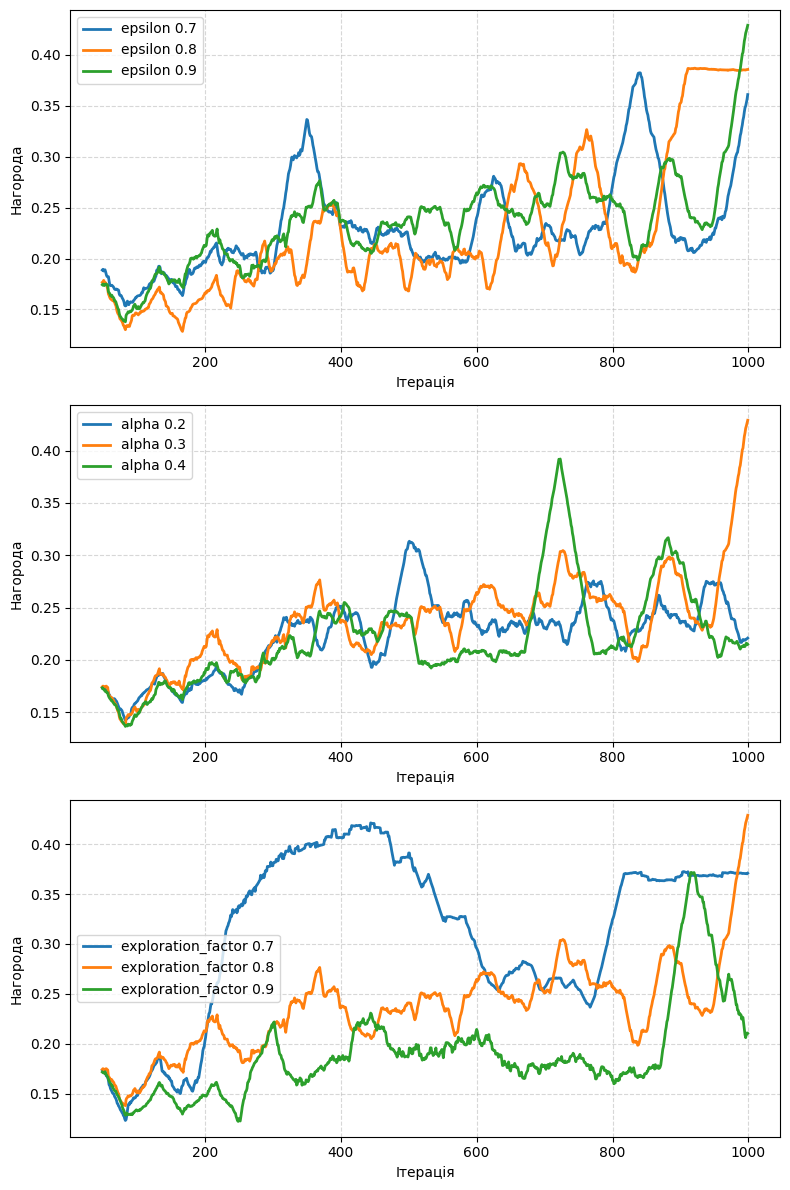

In [40]:
compare_ucb_params()